<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 2</h3></center> 



[Notebook](https://colab.research.google.com/drive/1CKUlvdEa1bJLS2_P7UeaPUWSZ_ZDUDSH) due November 06, 2020 at [23.59 EST](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-11-06&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/773268)


In [193]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Not mandatory to use
from sklearn.utils import resample

import matplotlib.pyplot as plt

import seaborn as sns

# Uncomment this line below if using seaborn
sns.set() 

%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## PCA

#### **Q1**

**12 points** = $(1.5 + 2 + 2 + 1.5 + 1.5 + 2 + 1.5)$

The cell below loads a subset of the California Housing dataset. 

  (a) Store only the `latitude`, `longitude` and `median_house_value` columns in a dataframe denoted by a variable `features`. Produce a scatter plot of the data points with `longitude` along x-axis, `latitude` along y-axis and the points colored by `median_house_value` i.e. higher the `median_house_value`, darker the data point in the plot.
  
  (b) Perform a PCA on the subset of the dataframe you created in (a) with only the `latitude` and `longitude` columns. Produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).

  (c) Provide a simple interpretation for what the first principal component `PC 1` could possibly represent in the plot in (b) by comparing it with that in (a). **Justify** your answer.
  
  (d) Repeat what you did in (b) above by setting the `whiten` parameter as `True` in the `PCA()` constructor and producing the plot. What difference do you observe? What do you think `whiten` does specifically in this problem?

  (e) Perform a PCA on the entire dataframe `features` with `whiten` set to `True` and produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).   

  (f) Observe how the color indicating `median_house_value` varies in the plot you produced in (e). Is the variation of `median_house_value` depicted in this plot simpler than what is indicated by all the above plots? Provide an **explanation** for why it is (or) it is not the case.
  
  (g) The California Department of Housing and Community Development (HCD) releases additional information about the data samples you used  here, by providing an `price_index` tag that can take values `high`, `middle` or `low` based `median_house_value`. If you were to eventually use the principal components you produced in (e), which one(s) among the `PC 1`, `PC 2`, `PC 3`, etc. would you use to classify the data samples into these three categories (`high`, `middle` and `low`)? Concretely **justify** your choice.  

**Bonus : (3 points)**
> (h) In the plot that you observe in (a), you will remark two major clusters that are the *darkest*. Let us identify the cluster with the higher value of `latitude` as the `SF cluster` and the one with the lower value of `latitude` as the `LA cluster`. Verify programmatically if this clustering is preserved or distorted in the plot in (e). What does this tell you about what is represented by the second principal component `PC 2` produced in (e)?



In [194]:
housing = pd.read_csv(path.format('california_housing.csv'))

In [195]:
housing.head()

longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]

**ANS 1 a)**

In [196]:
features=housing[['longitude','latitude','median_house_value']]
features.head()

longitude  latitude  median_house_value
0    -114.31     34.19             66900.0
1    -114.47     34.40             80100.0
2    -114.56     33.69             85700.0
3    -114.57     33.64             73400.0
4    -114.57     33.57             65500.0

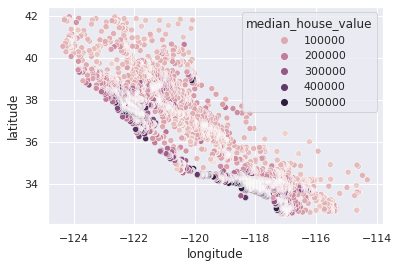

In [197]:
import seaborn as sns
sns.scatterplot(x='longitude',y='latitude',hue='median_house_value',data=features )

**ANS 1 b)**

In [198]:
from sklearn.decomposition import PCA
pca=PCA()
reduced=pca.fit_transform(features[['longitude','latitude']])
print('Explained variance ratio : ', pca.explained_variance_ratio_)

Explained variance ratio :  [0.96276223 0.03723777]


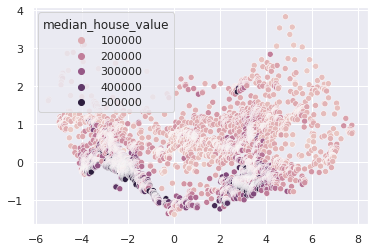

In [199]:
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue='median_house_value',data=features )

**ANS 1 c)**  *PC1 - latitude*, as the plot changes as if we swaped the axis. after fitting the dataset with PCA we got the value as 0.96276223 for PC1 ie latitude which is very essential to do the prediction ie. the variance is maximum which contains valuable information.

**ANS 1 d)**

Explained variance ratio :  [0.96276223 0.03723777]


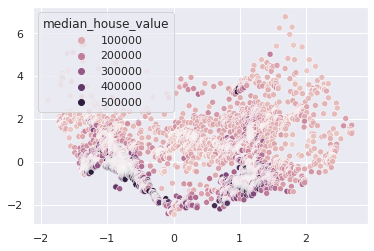

In [200]:
from sklearn.decomposition import PCA
pca=PCA(whiten=True)
reduced=pca.fit_transform(features[['longitude','latitude']])
print('Explained variance ratio : ', pca.explained_variance_ratio_)
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue='median_house_value',data=features )

**Comments:** There is a change in the scale of the graph . Generally whiten will ensure uncorrelated outputs with unit component wise variance and also some time it removes some information from the transformed signal. In this problem, there is no change in terms of datapoints as latitude and longitude are correlated.

**ANS 1 e)**

In [201]:
from sklearn.decomposition import PCA
pca=PCA(whiten=True)
reduced=pca.fit_transform(features)
print('Explained variance ratio : ', pca.explained_variance_ratio_)

Explained variance ratio :  [9.99999999e-01 6.12697795e-10 1.80407230e-11]


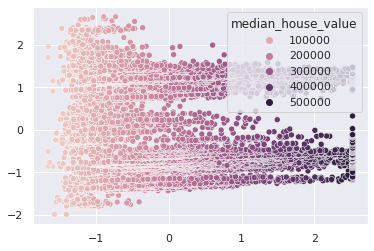

In [202]:
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue='median_house_value',data=features )

**ANS 1 f)** Yes, there is deviations in the graph representation, because PC1 is the median_house_value that is ploted in the X-axis. As the result, as you go towards right in the X-axis in the graph, we can see the median value is higher.

**Ans 1g)** It will be in PC1 which is median_house_value, as it holds most of the valuable information ie. variance in the data, to do classification of samples into categories. 

**Ans 1h)**

In [161]:
from sklearn.cluster import KMeans

# Create the model
kmeans = KMeans(n_clusters=2)

# Fit the model
kmeans.fit(reduced)

# Predict using the model 
cluster_labels = kmeans.labels_ 

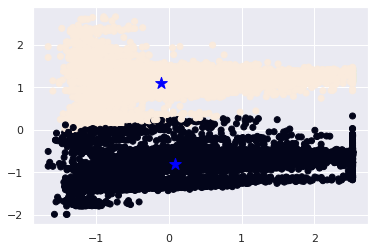

In [205]:
plt.scatter(reduced[:,0], reduced[:,1], c=cluster_labels)

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue',marker='*', s=150);

**Comments:** In PC2, it is latitude. Hence the cluster is preserved as SF Cluster in the higher value of latitude and LA cluster at the lower value of the latitude

## Clustering

#### **Q2**

**10 points** = $(1 + 2 + 3 + 1.5 + 1.5 + 2)$

A bird detection system that is equipped with multiple sensors is deployed in an observation station in an open space and it detects and collects some information about birds that visit the space. For each detected bird, it is able to collect the following information: 

*   `position` - a value of the form (`x`,`y`,`z`) which indicates the coordinates in a three-dimensional space defined by the LiDAR field of the system. `x` and `y` coordinates are in the range (-500,500) whereas `z` coordinate is in the range (0,150) where 0 indicates the ground level for `z`.
*   `sound_level` - a value in decibels (0-120 dB) of the sound made by the detected bird with 0 indicating no audible sound and 120 indicating maximum sound that can be detected. 
*   `time_of_visit` -  a value indicating number of milliseconds since the 00:00 hours of the day of collection.

The system sends out a table with the above three fields periodically to you. You are leading a team of data scientists to explore if the data collected by this system can be used to distinguish the different species of birds visiting the station located in the open space.  

(a) You decide that using clustering for initially attempting this problem is a good option. How would you *logically* convince your team of this? 

(b) Your team is trying to decide between using K-means and hierarchical clustering, both based on an Euclidean distance measure. Propose a list of preprocessing operations to be performed on the before you use any clustering algorithm on the raw dataset. **Justify** why you include each step. 

(c) An enthusiastic intern in your team selects a subset of *raw* data samples from the dataset, selecting some nocturnal birds that visit all together exactly at midnight everyday and they cannot produce any sound. They all have been observed to consistently sit on the ground along a straight line. He generates the following dendrogram (left) using an agglomerative hierarchical clustering with an appropriate linkage that maximizes intercluster dissimilarity. On the right is a top-view visualization of the arrangement of the birds in the station, based on the dendrogram. The bird B1 has already been placed. Place the birds B2 - B9 on the line with an *appropriate* spacing between them. **Explain** your choice.

<br/>
<br/>

<img width=750 src="https://i.ibb.co/M2ymGvm/nocturnal-birds.png" alt="Nocturnal Birds" border="0" /> 


(d)  You are informed by a group of expert ornitholigists that groups of birds that belong to different species, tend to visit the station in almost equal numbers per species. Based on this information, what type of linkage would you use in the hierarchical clustering algorithm? **Justify** your choice.

(e) The group of ornithologists have identified that exactly 10 species of birds visit the station. Does this information help you decide between choosing the K-means and hierarchical clustering algorithms? **Explain** why/why not.

(f) Briefly outline any **two** ways in which you can verify if the clustering you have performed has captured the natural grouping that exists among the actual data samples.

**Ans 2 a:**  There is no explicitly provided target variable, hence based upon the sound_level created by the bird, coordinates and the timing of the visit we can cluster the different bird species.

**Ans 2 b:**
 1. Feature Scaling on ['position','Sound_level'] - since it uses Euclidean distance measure without scaling it can mislead based on the weightage  of different feature.

 2.Bucketing- Can group by the data interms of hours/minutes based on the availability of the dataset.

3. Label encode the target variable- since the target variable are names of the bird, we can convert it to (0...n) . As strings are not handled well in machine learning models

**Ans 2c:** If we keep on cut the dendogram in different level, ie going from top to bottom(to individual point), we can get the nearest point which maximizes the inter cluster dissimilarites. 

**Ans 2d:** Average Linkage- As it will be robust to outliers in the clusters and the high cohesion is preserved .

**Ans 2e:** Yes, Based on the domain knowledge we have exactly 10 species of bird. Hence we can do K-means since finding the right number of cluster will always difficult in K-means. The major advantange of using k-means is , it runs faster compared to hierarchical clustering.

**Ans 2f:** 

1. we can manually visualize through 2D or 3D plot using PCA for dimensionality reduction.

2. If the sum of the squared distance is less, then the quality of the cluster is good.(ie more homogenous with tight cluster)



## Cross Validation

#### **Q3**

**10 points** = $(1 + 2 + 3 + 1.5 + 1 + 1.5)              $




Given below is a pair of plots generated while cross-validating a K-NN model trained on a dataset with various values of K using 12-fold CV and Leave-one-out (LOOCV) methods :                             

<img width=750 src="https://i.ibb.co/cyY7m6X/cv-graphs.png" alt="Trees" border="0" /> 

Answer the following questions:

(a) What is the motivation behind using cross-validation techniques such as LOOCV and k-fold CV over having a validation set?

(b) What could possibly explain the difference in the error curves in the two methods in the plots? 

(c) Describe how similar (or) different the error curves generated on the same dataset would look like for another independent run of **each of** the methods *12-fold* and *LOOCV*, compared to the plots above. **Explain** the reason for your answer in each case.    

(d) Under which circumstances would you would favour using LOOCV over k-fold CV?  

(e) Based on the above plots, what is the best value for the hyperparameter K of the model? **Explain why.** 

(f) What type of hyperparameter search do the above plots illustrate? **Explain**.



**ANS 3 a)** When there is less data split the data into train, validation and test would not be a good approach. Because, there would be insufficient data for training the model and testing it. At this scenario, LOOCV and k-fold are used.

**Ans 3 b)** The difference in error curves is because of the bias variance tradeoff in the error rate. EG: LOOCV has less bias, where as K-fold has high bias beause of the training pattern. We can see in the graph that the error rate in 12-fold, it changes drastically whereas there is no drastic change in LOOCV.

**Ans 3 c)** In 12-fold, there is randomness during the split of training and validation sets. As a result there will be different results when we apply 12-fold technique

In LOOCV- it yeilds the almost same result as there is no major randomness in the splits

**Ans 3 d)** When the data is very less EG: 20 records, then using Leave one out cross validation will almost use all the training data, so that we can get good performance, whereas using k-fold would be effective since we have to reserver k-fold datasets for testing which will affects the model generalizing ability.

**ANS 3 e)** K=5, because the error rate is low when compared with other K values. ie. the error rate converge at K=5, after which the error rate starts to increase.

**Ans 3 f)** It follows **grid search**. k values are stored in dictionary or list and ran the model using grid search and the error rate results are stored and plotted in the form of line graph.

## Inference and Bootstrapping

#### **Q4**

**16 points** = $(1.5 + 1.5 + 1.5 + 1.5 + 2 + 2 + 1.5 + 1.5 + 1.5 + 1.5)$

The dataset loaded in the next cell consists of data from a drug trial experiment.  
* `subject_type` indicates 0 for if a subject is a *control* and 1 if taking *treatment*. 
* `daily_dosage` indicates the dosage of the drug in millilitres (mL)
* `life_expectancy` show the projected age (year) upto which that the subject is expected to live.

Let the field `subject_type` in the dataset correspond to $x_{type}$, `daily_dosage` to $x_{dosage}$ and `life_expectancy` to $y$.

  (a) Now, consider the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{type} x_{type} + \beta_{0} + \epsilon$$

  Write your code to perform this regression and list the coefficient estimates $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtained by running your code.

  (b) Run a bootstrap of the dataset over 500 iterations, and collect the coefficients $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtain in each iteration. 

  (c) Use the coefficient estimates that you collected in (b) and estimate the standard errors of all the 3 coefficients $S.E.(\hat{\beta}_{dosage})$, $S.E.(\hat{\beta}_{type})$ and $S.E.(\hat{\beta}_{0})$. 
  
  (d) Plot a histogram to observe the distribution of each of the collected coefficient estimates. What do you observe?

  (e) Provide a 95% confidence interval for each of the coefficient estimates. What does this interval mean?

  (f) Generate the scatterplot for the points in the dataset with `daily_dosage` on the x-axis, `life_expectancy` on the y-axis and the points colored by the `subject_type` value (separate colors to indicate the types 0 and 1) with the collected 500 bootstrap sampled fits overlaid. To make the plot easier to read, reduce the transparency of the lines.

  (g) Based on all the above, **explain** intuitively what is conveyed by the plot you generated in (f).
    
  (h) Make a scatterplot of the bootstrapped coefficients, $\left(\beta_{type}^{\ast}, \beta_{dosage}^{\ast}\right)$ against one another. **Comment** on the overall distribution of these two coefficients **and** the nature of correlation between them.
  
  (i) Similar to above, estimate the coefficient estimates $\hat{\beta}_{dosage}$ and $\hat{\beta}_{0}$ and the standard error of the dosage coefficient $S.E.(\hat{\beta}_{dosage})$ by bootstrapping the dataset over 500 iterations and fitting the dataset in the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{0} + \epsilon$$
  
  (j) Comparing the results in (i) and (c), what can you comment about the relationship of `daily_dosage` and `subject_type` with `life_expectancy`? 

**Bonus : (3 points)**
> (k) In a bootstrap of the dataset over 500 iterations similar to the above, perform an independent t-test with an $\alpha=0.05$ significance level, using `scipy.stats.ttest_ind` on the `life_expectancy` of these two groups . Collect the p-values and plot the p-value histogram. 

In [163]:
trials = pd.read_csv(path.format('drug-trials.csv'))

In [164]:
trials.head()


subject_type  daily_dosage  life_expectancy
0             0        22.762         63.39666
1             0        22.762         80.14504
2             1        16.036         82.31560
3             1        23.830         84.20141
4             0         3.073         57.28034

**Ans 4a:**

In [206]:
regression=LinearRegression()
regression.fit(trials[['daily_dosage','subject_type']],trials['life_expectancy'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
print('coeff_dosage',regression.coef_[0])
print('coeff_type',regression.coef_[1])
print('intercept',regression.intercept_)

coeff_dosage 0.27154927305417337
coeff_type 5.668116800500299
intercept 65.67943220081068


**Ans 4b:**

In [213]:
values = trials.values
coeff_dosage=[]
coeff_type=[]
intercept=[]
for i in range(0,500):
  
  # Prepare train and test sets
  train = resample(values,n_samples=len(values))
	# Fit model
  model = LinearRegression()

  model.fit(train[:,[1,0]], train[:,-1])
  coeff_dosage.append(model.coef_[0])
  coeff_type.append(model.coef_[1])
  intercept.append(model.intercept_)

**Ans 4c)**

In [217]:
denominator=np.sqrt(len(coeff_dosage))

In [218]:
std_coeff_dosage=(np.std(np.array(coeff_dosage)))/denominator
std_coeff_type=(np.std(np.array(coeff_type)))/denominator
std_intercept=(np.std(np.array(intercept)))/denominator

In [219]:
print(std_coeff_dosage)
print(std_coeff_type)
print(std_intercept)

0.005021044104181369
0.08522040922282825
0.10139597453775986


**Ans 4d:**

(array([  3.,  10.,  32.,  71.,  98., 114.,  94.,  51.,  20.,   7.]),
 array([-0.06105397,  0.00441362,  0.06988121,  0.1353488 ,  0.20081639,
         0.26628398,  0.33175157,  0.39721916,  0.46268675,  0.52815434,
         0.59362193]),
 <a list of 10 Patch objects>)

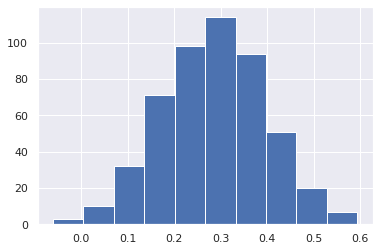

In [220]:
plt.hist(coeff_dosage)

(array([  3.,  16.,  34.,  84., 118., 120.,  78.,  34.,   8.,   5.]),
 array([-0.23492365,  0.9538799 ,  2.14268344,  3.33148699,  4.52029054,
         5.70909409,  6.89789763,  8.08670118,  9.27550473, 10.46430828,
        11.65311183]),
 <a list of 10 Patch objects>)

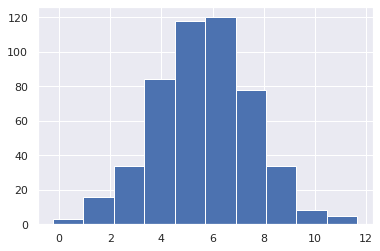

In [221]:
plt.hist(coeff_type)


(array([  8.,  16.,  52.,  85., 101., 107.,  72.,  44.,  12.,   3.]),
 array([59.26649269, 60.54299425, 61.8194958 , 63.09599736, 64.37249891,
        65.64900047, 66.92550202, 68.20200358, 69.47850513, 70.75500669,
        72.03150825]),
 <a list of 10 Patch objects>)

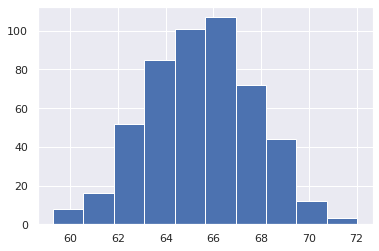

In [222]:
plt.hist(intercept)

**Ans 4e:** 

In [223]:
# Confidence interval

confidence_percentage = 95

# p-values
p = (100-confidence_percentage)/2 
# Quartiles
lower = np.percentile(coeff_dosage, p)
upper = np.percentile(coeff_dosage, 100 - p)
print('coeff_dosage CI : ({:d}%) confidence interval = [{:.1f},{:.1f}]'.format(int(confidence_percentage), lower, upper))

coeff_dosage CI : (95%) confidence interval = [0.1,0.5]


In [224]:
# Quartiles
lower =np.percentile(coeff_type, p)
upper = np.percentile(coeff_type, 100 - p)

print('coeff_type CI : ({:d}%) confidence interval = [{:.1f},{:.1f}]'.format(int(confidence_percentage), lower, upper))

coeff_type CI : (95%) confidence interval = [1.8,9.4]


In [225]:
# Quartiles
lower = np.percentile(intercept, p)
upper = np.percentile(intercept, 100 - p)

print('intercept CI : ({:d}%) confidence interval = [{:.1f},{:.1f}]'.format(int(confidence_percentage), lower, upper))

intercept CI : (95%) confidence interval = [60.9,69.6]


**Comments:** The confidence interval states that , we can be 95% confident that the values falls between the range of intervals.

**Ans 4f)**

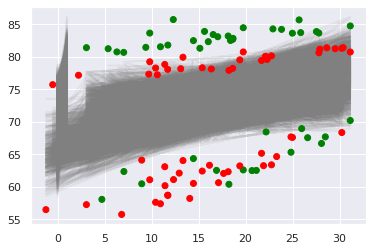

In [177]:
values = trials.values

colors = {0:'red', 1:'green'}

plt.scatter(trials['daily_dosage'],trials['life_expectancy'], marker='o', c=trials['subject_type'].map(colors), zorder=4)
for i in range(0,500):
  
  # Prepare train and test sets
  train = resample(values,n_samples=len(values))
	# Fit model
  model = LinearRegression()
  model.fit(train[:,[1,0]], train[:,-1])
  plt.plot(train[:,[1,0]], model.predict(train[:,[1,0]]), color='grey', alpha=0.1, zorder=1)


**Ans 4g)**  The linear regression lines are in the center as there are two group of points(top and the bottom) which are pulling towards them, the regression is trying to reduce the error rate as a result, there is a line in the centre between the two group of points

**Ans 4h)**

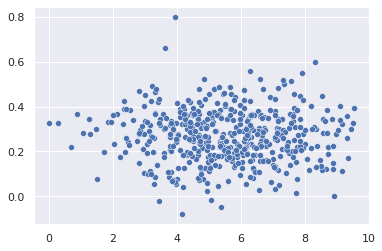

In [178]:
sns.scatterplot(x=coeff_type,y=coeff_dosage)

**Comment:** The data is centered toward the centre and there is no correlation between the subject type and the dosage features.

**Ans 4i)**

In [179]:
values = trials.values
coeff_dosage=[]
coeff_type=[]
intercept=[]
for i in range(0,500):
  
  # Prepare train and test sets
  train = resample(values,n_samples=len(values))
	# Fit model
  model = LinearRegression()

  model.fit(train[:,[1]], train[:,-1])
  coeff_dosage.append(model.coef_[0])
  intercept.append(model.intercept_)


print()
std_coeff_dosage=(np.std(np.array(coeff_dosage)))/denominator
std_intercept=(np.std(np.array(intercept)))/denominator

print(std_coeff_dosage)
print(std_intercept)


0.0053350192595729455
0.11070210190403883


**Ans 4j)** When compared with the standard error in c, it is almost the same. Even though we didn't use subject_type, there is no difference, since there is no correlation between subject_type and the dosage to determine the life expectancy.

**Ans 4k)**

In [229]:

# Student's t-test for independent samples
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from scipy import stats
pvalues=[]
values = trials.values
for i in range(0,500):
  
  # Prepare train and test sets
  values = trials.values
  train = resample(values,n_samples=len(values))
  d0=train[train[:,0]==0]
  d1=train[train[:,0]==1]
  t_stat, p_val = stats.ttest_ind(d0[:,2],d1[:,2])
  # if it falls below the significance value, we reject the hypothesis

  if p_val>0.05:
    pvalues.append(p_val)

(array([32., 12.,  8.,  4.,  1.,  2.,  0.,  0.,  0.,  3.]),
 array([0.05042356, 0.11105996, 0.17169637, 0.23233277, 0.29296917,
        0.35360558, 0.41424198, 0.47487838, 0.53551479, 0.59615119,
        0.6567876 ]),
 <a list of 10 Patch objects>)

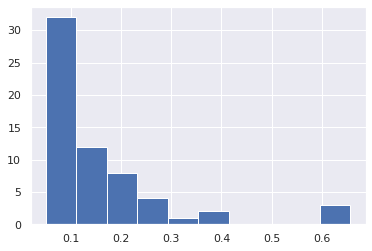

In [230]:
# plt.vlines(0.05,0,500,linestyles='--', label='Significance value-0.05')
# plt.legend(loc='best')

plt.hist(pvalues)

## Feature Engineering

#### **Q5**

**4 points** = $(1.5 + 2.5)$                

Given below is a cell that loads a dataset that contains features representing the body measurements of certain types of sharks in various regions in Canada.

Using programming, perform analyses using the following methods to identify the outlier samples in the dataset : 

  (a) For each *feature* among `body_length`, `fin_length` and `tail_length` in the dataset, use a box plot to visualize the feature values (along y-axis) grouped by `region` feature (show on x-axis). Identify the `region` and `feature` (other than `region`) that shows the highest number of outliers. 

  (b) For the `region` and the `feature` you chose in (a), use the Q3-Q1 Inter-Quartile Range (IQR) to identify and list the rows of the outliers from the dataframe. 


In [185]:
sharks = pd.read_csv(path.format('ca-sharks.csv'))

In [186]:
sharks.head()

id region  fin_length  body_length  tail_length
0   1     QC        54.2     480.8800     3.727446
1   2     QC        60.2     514.8664     3.853217
2   3     QC        65.1     561.3359     3.839753
3   4     QC        69.8     532.7045     3.866420
4   5     QC        77.0     613.4460     3.821723

**Ans 5a)**

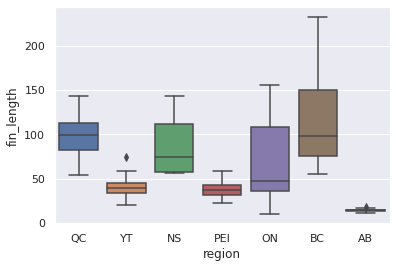

In [187]:
import seaborn as sns
sns.boxplot(x='region',y= 'fin_length',data=sharks)

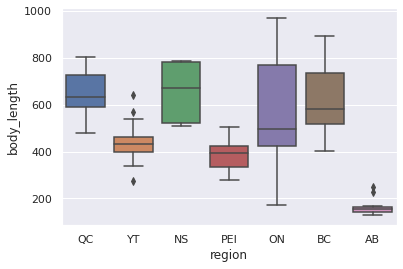

In [188]:
import seaborn as sns
sns.boxplot(x='region',y= 'body_length',data=sharks)

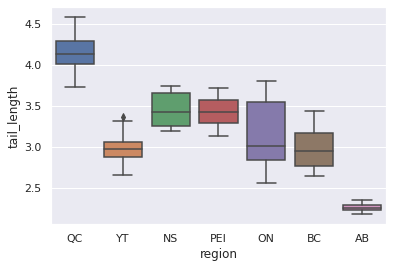

In [189]:
import seaborn as sns
sns.boxplot(x='region',y= 'tail_length',data=sharks)

**Comments:** For the region **YT** with respect to **body_length** shows the highest number of outliers based on the box plot.

**Ans 5b)**

In [190]:
new_df=sharks[sharks['region']=='YT']
new_df=new_df[['region','body_length']]

In [191]:
Q1 = new_df['body_length'].quantile(0.25)
Q3 = new_df['body_length'].quantile(0.75)
IQR = Q3 - Q1

new_df_out=new_df[(new_df['body_length']<(Q1-1.5*IQR)) |(new_df['body_length']>(Q3+1.5*IQR)) ]
new_df_out.head()

region  body_length
35     YT     272.3920
53     YT     570.5584
54     YT     639.7450

#### **Q6**

**8 points** = $(1 + 3 + 2 + 2 )$                

For the questions below, answer briefly by inspecting the dataset below. (There is no need to use any programming) :

This is a representative subset of a collected dataset with information about used buses across three Canadian cities. A model needs to be fit to predict the selling price `Price($)` of a bus. `--` indicates that the information is not available. 

ID|City|Province|Vehicle model|Category|Mileage(kmpl)|Certification|Year|Num_Damages|Price($) 
--|--|--|--|--|--|--|--|--|--|
1|Montréal|QC|CX-120|School|2.5|Certified|2018|3|44900
2|Vancouver|BC|AL-100|Tourism|5|Not certified|2016|--|22380
3|Toronto|ON|WS-978|Tourism|--|Certified|--|--|30000
4|Vancouver|BC|RR8|Factory|1.5|Certified|2012|5|10500
5|Toronto|ON|GH-50|Factory|4.5|Not certified|2015|--|12000
6|Montréal|QC|--|School|--|Not certified|2010|--|8000


(a) List the features that you would remove from the dataset before using it for model fitting. Give valid **reasons** for your answer.

(b) List the features that need to be encoded in this dataset and outline which encoding schemes your would use in each case. Give valid **reasons** for your answer.

(c) What type of an imputation scheme would make sense for the missing values in each of the fields `Year` and `Mileage`? Give valid **reasons** for your answer.

(d) You propose to use the simplest sparsity-based method to select the best features among those given in the dataset. In just two lines, describe the high-level procedure to do this.

**ANS 6 a)**

 ID --> the data in ID might mislead the model(Irrelevant feature) as it doesn't have any importance to determine the price of the bus

Province --> It is an reduntant feature, our objective is to find the bus price in canadian cities which will be given by cities colum/feature.

Num_Damages--> As there are so many missing values

**ANS 6b)** ['city','Vehicle model','Category'] are the columns need to encoded. We can use **One-hot encoder** because if we fill it as 1,2,3.... the weightage of the model would be biased towards higher value, hence using one hot encoding will slove the problem of higher the number more importance in a categorical feature

['Certification']-- Label Encoding. As there is a ordinal present. Because, certified has higher credibility than the non-certified buses. 

**Note:** Province column should be one hot encoded, since we are dropped it in the previous question, we avoided it.

**Ans 6c)** 
Year- Use of mode value- since the year and price column as positively correlated(ie if the year is latest then the price is also high) it is a important column. mode would not be affected by extremely high and low values .

Mileage- Use Mean over the Mileage column to fill the missing value, because in the factory the value deviates a lot(1.5 and 4.5) hence class wise mean wont work out.

**ANS 6d** we can use "Lasso" Sparsity method, the higher the value,of |w| the feature is more important.

High level procedure:
Add a regularization parameter $\lambda * ||w||_1$ to the loss function
Most of the irrelvant features will be made as 0 because of the constraint region.